#Ebrahim Hirani
#2018130015
#Batch A
#Experiment 1-A

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/MyDrive/DS")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
## set matplotlib defaults;
plt.style.use('seaborn-whitegrid')
plt.rc(
    'figure', 
    autolayout = True
)
plt.rc(
    'axes', 
    labelsize = 'large', 
    labelweight = 'bold', 
    titlesize = 'large', 
    titleweight = 14, 
    titlepad = 10
)


In [ ]:
df = pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


#Data Cleaning

In [ ]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
df['origin'].unique()

array([1, 3, 2])

#### The `origin` Column is categorical not numerical, so we will one-hot-encode the values in the column using `pd.get_dummies` method.

In [ ]:
df['origin'] = df['origin'].map({1: '1', 2: '2', 3: '3'})
df = pd.get_dummies(df, columns = ['origin'], prefix = '', prefix_sep = '')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,1,2,3
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,ford torino,1,0,0


In [ ]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,1,2,3
393,27.0,4,140.0,86,2790,15.6,82,ford mustang gl,1,0,0
394,44.0,4,97.0,52,2130,24.6,82,vw pickup,0,1,0
395,32.0,4,135.0,84,2295,11.6,82,dodge rampage,1,0,0
396,28.0,4,120.0,79,2625,18.6,82,ford ranger,1,0,0
397,31.0,4,119.0,82,2720,19.4,82,chevy s-10,1,0,0


In [ ]:
len(df['car name'].unique())

305

Since the number of car models are huge, we just use the brand name.


In [ ]:
def getBrand(s):
  return s.split()[0].lower()

In [ ]:
df['brand'] = df['car name'].apply(getBrand)

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,1,2,3,brand
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu,1,0,0,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320,1,0,0,buick
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite,1,0,0,plymouth
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst,1,0,0,amc
4,17.0,8,302.0,140,3449,10.5,70,ford torino,1,0,0,ford


In [ ]:
len(df['brand'].unique())

37

In [ ]:
df = df[df['horsepower']!= "?"]

In [ ]:
df['horsepower'] = df['horsepower'].astype('int')

In [ ]:
df = df.drop(columns = ["car name"])

In [ ]:
df = pd.get_dummies(df)

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,1,2,3,brand_amc,brand_audi,brand_bmw,brand_buick,brand_cadillac,brand_capri,brand_chevroelt,brand_chevrolet,brand_chevy,brand_chrysler,brand_datsun,brand_dodge,brand_fiat,brand_ford,brand_hi,brand_honda,brand_maxda,brand_mazda,brand_mercedes,brand_mercedes-benz,brand_mercury,brand_nissan,brand_oldsmobile,brand_opel,brand_peugeot,brand_plymouth,brand_pontiac,brand_renault,brand_saab,brand_subaru,brand_toyota,brand_toyouta,brand_triumph,brand_vokswagen,brand_volkswagen,brand_volvo,brand_vw
0,18.0,8,307.0,130,3504,12.0,70,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


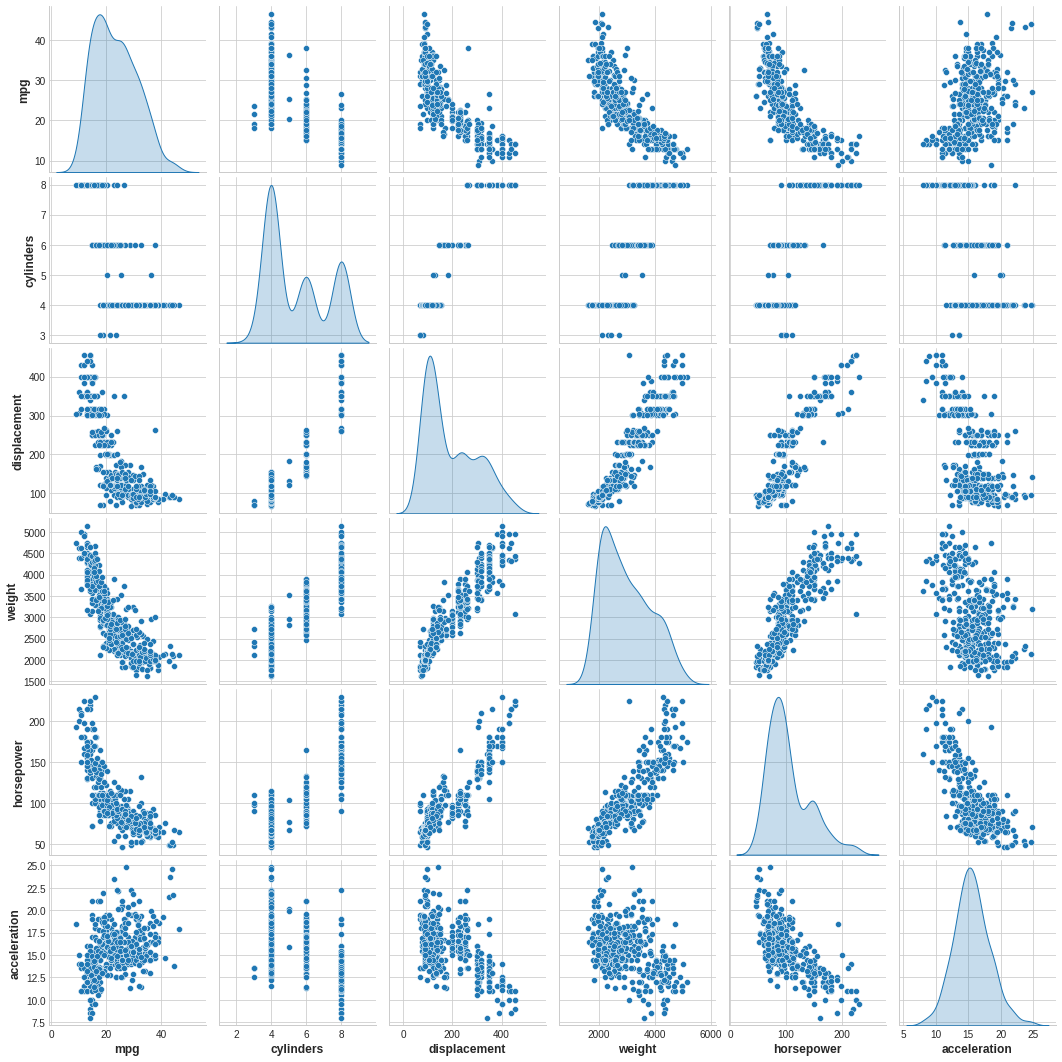

In [ ]:
#let's review the joint distribution of a few pairs of columns from the training dataset;
sns.pairplot(df[['mpg', 'cylinders', 'displacement', 'weight',"horsepower", "acceleration"]], diag_kind = 'kde')
plt.show()

In [ ]:
df[['mpg', 'cylinders', 'displacement', 'weight',"horsepower", "acceleration"]].corr()

,mpg,cylinders,displacement,weight,horsepower,acceleration
mpg,1.000000,-0.777618,-0.805127,-0.832244,-0.778427,0.423329
cylinders,-0.777618,1.000000,0.950823,0.897527,0.842983,-0.504683
displacement,-0.805127,0.950823,1.000000,0.932994,0.897257,-0.543800
weight,-0.832244,0.897527,0.932994,1.000000,0.864538,-0.416839
horsepower,-0.778427,0.842983,0.897257,0.864538,1.000000,-0.689196
acceleration,0.423329,-0.504683,-0.543800,-0.416839,-0.689196,1.000000


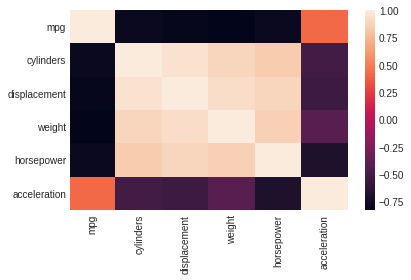

In [ ]:
sns.heatmap(df[['mpg', 'cylinders', 'displacement', 'weight',"horsepower", "acceleration"]].corr(method = "pearson"))

In [ ]:
## now we will split the data into train and test datasets, so we will use the test set in the final evaluation of our models;
train_df = df.sample(frac = 0.8, random_state = 0)
test_df = df.drop(train_df.index)

In [ ]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
model year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
1,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
2,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
3,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


### split the target feature which is `mpg` feature, set it as label feature

In [ ]:

train_labels = train_df['mpg'].copy()
test_labels = test_df['mpg'].copy()
train = train_df.drop(columns = ['mpg'])
test = test_df.drop(columns = ['mpg'])

Apply min-max scaling to bring all features to similar scales

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_train = min_max_scaler.fit_transform(train.values)
x_test = min_max_scaler.transform(test.values)

In [ ]:
x_train[0]

array([0.2       , 0.05684755, 0.16201117, 0.13635062, 0.38690476,
       0.33333333, 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [ ]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
  
regr.fit(x_train, train_labels)
print("R-square score on test dataset",regr.score(x_test, test_labels))

R-square score on test dataset -2.589447409106897e+22


In [ ]:
print("R-square score on train dataset",regr.score(x_train, train_labels))

R-square score on train dataset 0.862485682029858


In [ ]:
pred = regr.predict(x_test)
res = pd.DataFrame({"y": test_labels, "pred":pred})
res["diff"] = res['y'] - res['pred']
res.tail()

,y,pred,diff
369,34.0,28.582031,5.417969
375,36.0,32.750000,3.250000
382,34.0,32.734375,1.265625
384,32.0,37.242188,-5.242188
396,28.0,26.851562,1.148438


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_labels, pred, squared = False)

1300416480309.4116

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(train_labels, regr.predict(x_train), squared = False)

2.861442721606577

The model is overfitting

Try after using only physical characteristics

In [ ]:
train_labels = train_df['mpg'].copy()
test_labels = test_df['mpg'].copy()
train = train_df.drop(columns = ['mpg'])
test = test_df.drop(columns = ['mpg'])

In [ ]:
train = train[['cylinders', 'displacement', 'weight',"horsepower", "acceleration"]]
test = test[['cylinders', 'displacement', 'weight',"horsepower", "acceleration"]]


In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_train = min_max_scaler.fit_transform(train.values)
x_test = min_max_scaler.transform(test.values)

In [ ]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
  
regr.fit(x_train, train_labels)
print("R-square score on test dataset",regr.score(x_test, test_labels))

R-square score on test dataset 0.7579355140006467


In [ ]:
print("R-square score on train dataset",regr.score(x_train, train_labels))

R-square score on train dataset 0.6909246503147817


In [ ]:
pred = regr.predict(x_test)
res = pd.DataFrame({"y": test_labels, "pred":pred})
res["diff"] = res['y'] - res['pred']
res.tail()

,y,pred,diff
369,34.0,27.356956,6.643044
375,36.0,30.479763,5.520237
382,34.0,29.227794,4.772206
384,32.0,30.941528,1.058472
396,28.0,26.696235,1.303765


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_labels, pred, squared = False)

3.975982424162081

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(train_labels, regr.predict(x_train), squared = False)

4.289861607985112

##Conclusion: 

The model without categorical variables shows a higher accuracy and can be attributed to the overfitting of the model trained on categorical variables. The reason for this could be that there are many categories, each category serving as a feature, which increases the feature count significantly leading to unnecessary information causing overfitting.



